In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

**Load Data: Load the dataset from a CSV file using pandas**

In [ ]:
df = pd.read_csv(r"C:\Users\白猪白猪\Documents\Documents\CMSE802\Class_Material\Homework\Project\Data\imputed_pca_data.csv")

**Select Numerical Data: Isolate the numerical columns from the dataset for further analysis**

In [ ]:
numerical_df = df.iloc[:, 3:]

**Data Scaling: Scale the numerical data to a range of 0 to 1 using MinMaxScaler for normalization**

In [ ]:
scaler    = MinMaxScaler(feature_range=(0,1))
scaler.fit(numerical_df)

**Transform Data: Apply the fitted scaler to transform the data and create a new DataFrame with the scaled values**

In [ ]:
P  = scaler.fit_transform(numerical_df)
P_df = pd.DataFrame(P, columns=numerical_df.columns)

**Normality Test: Perform a Shapiro-Wilk test on the columns to check for normal distribution**

In [30]:
from scipy.stats import shapiro

data_series = df['pKa']

stat, p = shapiro(data_series)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample data are normally distributed')
else:
    print('Sample data not normally distributed')

Statistics=0.871, p=0.000
Sample data not normally distributed


**Correlation Matrix: Calculate the Spearman correlation matrix for the scaled numerical data**

In [31]:
correlation_matrix = P_df.corr(method='spearman')

**Visualize Correlation: Use seaborn to create a heatmap of the correlation matrix to visualize the strength and direction of relationships between variables**

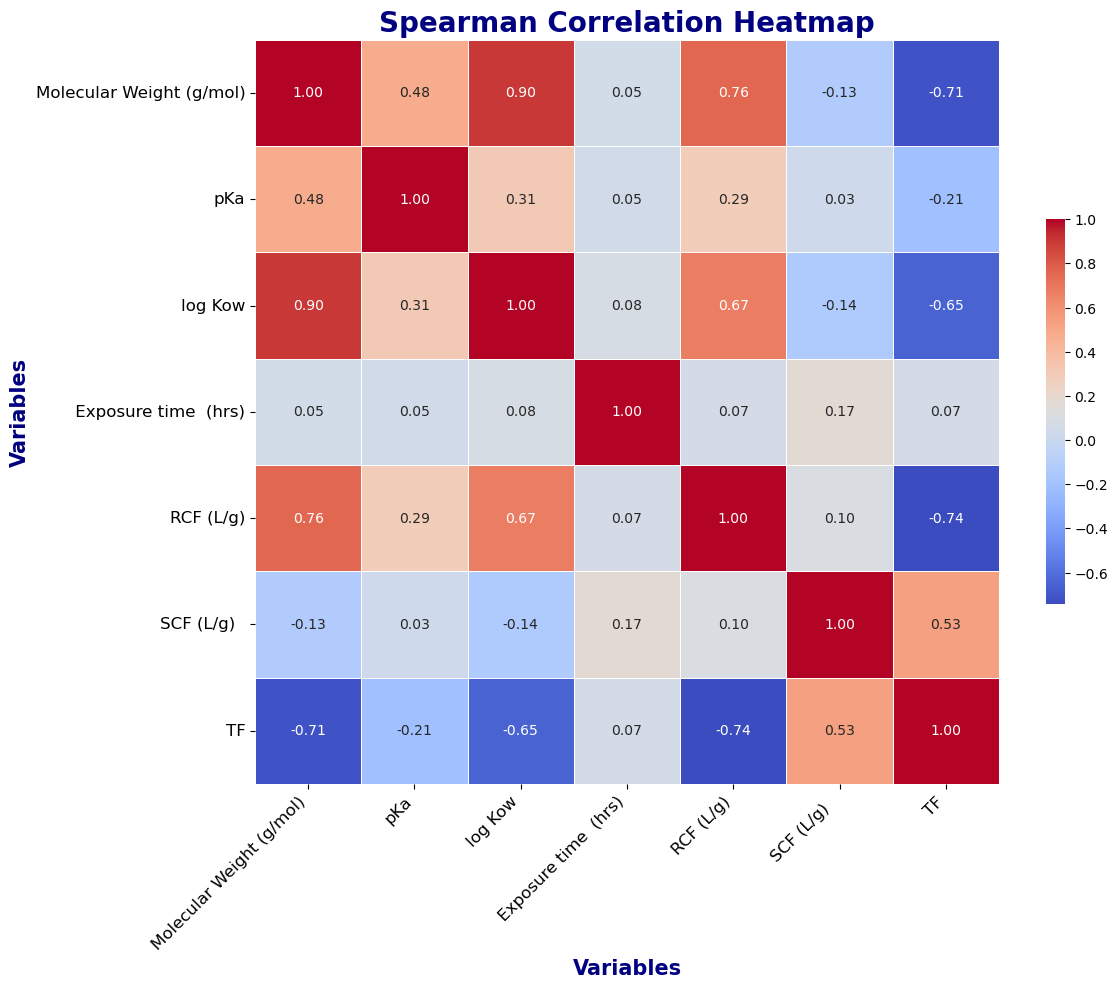

In [32]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
                 square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title('Spearman Correlation Heatmap', fontsize=20, fontweight='bold', color='navy')
ax.set_xlabel('Variables', fontsize=15, fontweight='bold', color='navy')
ax.set_ylabel('Variables', fontsize=15, fontweight='bold', color='navy')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontsize=12)

ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)

plt.show()